<a href="https://colab.research.google.com/github/gusanitor8/Lab6_NLP/blob/main/Lab6_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOMBRES: Gustavo Andres

APELLIDOS: Gonzalez Pineda

CARNE: 21438

FECHA: 25/09/2025

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

import matplotlib.pyplot as plt

**Ejercicio 1**
Cree un dataset con noticias (Pueden ser falsas) para poder clasificarlas por categoria (Recomiendo que sea binaria para su comodidad)

In [2]:
# Dataset pequeño de noticias falsas/verdaderas
noticias = [
    "El presidente anuncia nuevas medidas económicas",
    "Un OVNI fue visto sobrevolando la ciudad de Guatemala",
    "La selección nacional ganó el partido de clasificación",
    "Descubren una fórmula para vivir 200 años",
    "La universidad inaugura un nuevo laboratorio de inteligencia artificial",
    "Se encontraron pruebas de dragones en Asia",
    "El volcán hizo erupción y afectó a varias comunidades",
    "Las pirámides fueron construidas por extraterrestres",
    "Se implementa una campaña de vacunación nacional",
    "Una persona afirma haber viajado en el tiempo"
]

# Etiquetas: 1 = verdadero, 0 = falso (inventadas)
labels = [1,0,1,0,1,0,1,0,1,0]

# Tokenización
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(noticias)
sequences = tokenizer.texts_to_sequences(noticias)
padded = pad_sequences(sequences, padding='post', maxlen=20)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

print("Tamaño vocabulario:", len(tokenizer.word_index))
print("Ejemplo de secuencia:", sequences[0])
print("Forma del dataset:", X_train.shape, X_test.shape)


Tamaño vocabulario: 62
Ejemplo de secuencia: [3, 10, 11, 12, 13, 14]
Forma del dataset: (8, 20) (2, 20)


**Ejercicio 2**
 En base al dataset creado anteriormente Realizar una CNN para poder clasificarla de manera automatica, debe de realizarla con 3 filtros y dejar cada una de ellas como una implementacion nuevo por lo que recomiendo trabajarlo por funciones

In [5]:
vocab_size = 1000
embedding_dim = 50
max_length = 20

def build_cnn(filter_size):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Conv1D(filters=64, kernel_size=filter_size, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Entrenar modelos con distintos filtros
filter_sizes = [3,4,5]
histories = {}
results = {}

for f in filter_sizes:
    print(f"Entrenando modelo con filtro={f}...")
    model = build_cnn(f)
    history = model.fit(np.array(X_train), np.array(y_train),
                        epochs=10, validation_data=(np.array(X_test), np.array(y_test)),
                        verbose=0)
    loss, acc = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
    histories[f] = history
    results[f] = {"loss": loss, "acc": acc}

print("Resultados:", results)


Entrenando modelo con filtro=3...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Entrenando modelo con filtro=4...
Entrenando modelo con filtro=5...
Resultados: {3: {'loss': 0.6943362951278687, 'acc': 0.5}, 4: {'loss': 0.6893373727798462, 'acc': 0.5}, 5: {'loss': 0.7023379802703857, 'acc': 0.5}}


**Ejercicio 3**
Debe de discutir sus resultados y realizar una comparacion de porque varia dependiendo del filtro que se use

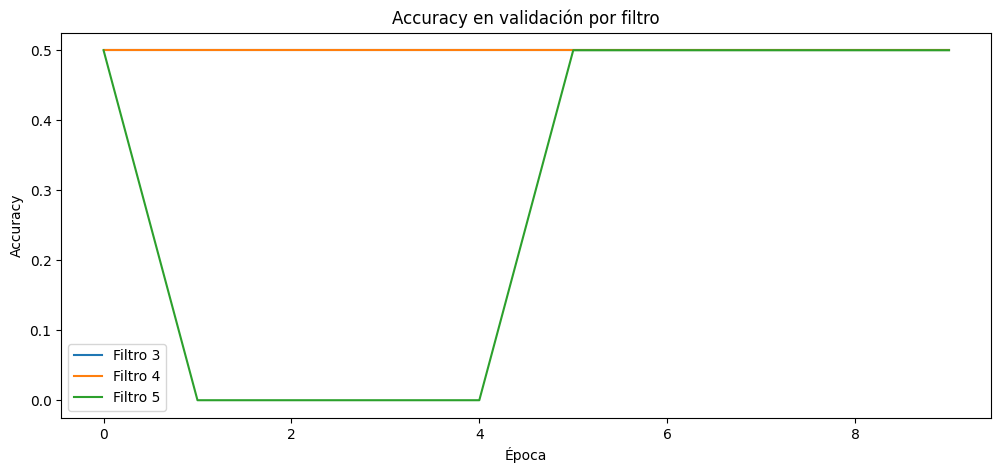

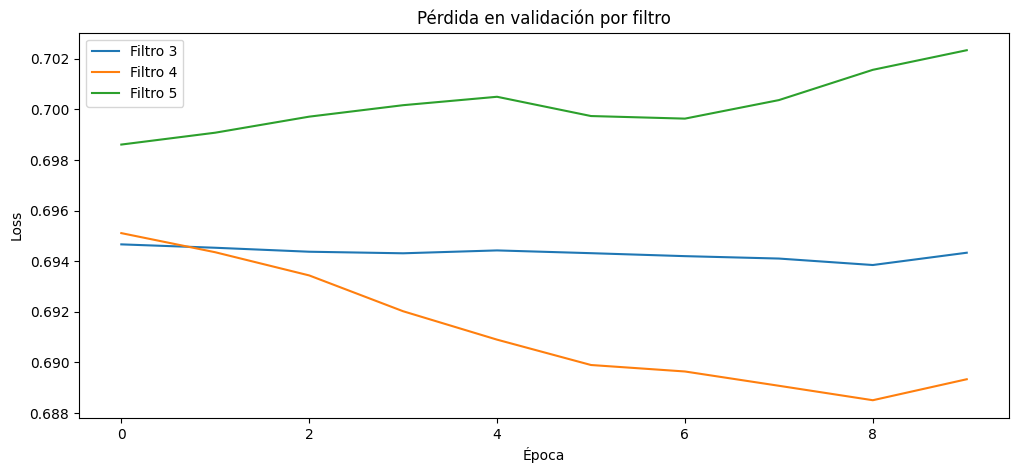

Resultados finales: {3: {'loss': 0.6943362951278687, 'acc': 0.5}, 4: {'loss': 0.6893373727798462, 'acc': 0.5}, 5: {'loss': 0.7023379802703857, 'acc': 0.5}}


In [6]:
plt.figure(figsize=(12,5))

for f, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'Filtro {f}')
plt.title("Accuracy en validación por filtro")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
for f, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'Filtro {f}')
plt.title("Pérdida en validación por filtro")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("Resultados finales:", results)


En este experimento los tres modelos (con filtros de tamaño 3, 4 y 5) obtuvieron un accuracy constante de 0.5, lo que indica que el desempeño no supera el azar en un problema de clasificación binaria. Esto puede explicarse por el tamaño reducido del dataset, lo cual limita la capacidad del modelo para aprender patrones representativos.

Al comparar los filtros, se observa que el filtro de tamaño 4 obtiene una pérdida de validación ligeramente menor (\~0.689) en comparación con los filtros de tamaño 3 (\~0.694) y 5 (\~0.702). Esto sugiere que, en este caso, la ventana de 4 palabras logra capturar un poco mejor las relaciones locales en el texto que los filtros más pequeños o más grandes.

En general, los filtros pequeños (3 palabras) tienden a capturar expresiones muy locales (como frases cortas), mientras que los filtros grandes (5 palabras o más) buscan patrones más largos que pueden no ser tan frecuentes en un dataset reducido. El filtro intermedio (4) ofrece un balance entre ambos extremos, aunque debido a la escasez de datos no logra reflejarse en una mejora significativa de accuracy.